In [29]:
import sys
import os
import json
import pickle

main_dir = os.path.dirname(os.path.abspath(''))
sys.path.insert(0, main_dir)

from src.commands.generate_volume import generate_volume
from src import analysis
import matplotlib.pyplot as plt
import numpy as np

import umap

In [30]:
main_path = '/net/jiang/scratch/li3221/cryofire/10340_simulate'
relative_config_path = main_path+'/empiar10340_sim_helix.json'
with open(relative_config_path, 'r') as f:
    config = json.load(f)

In [32]:
## PCA

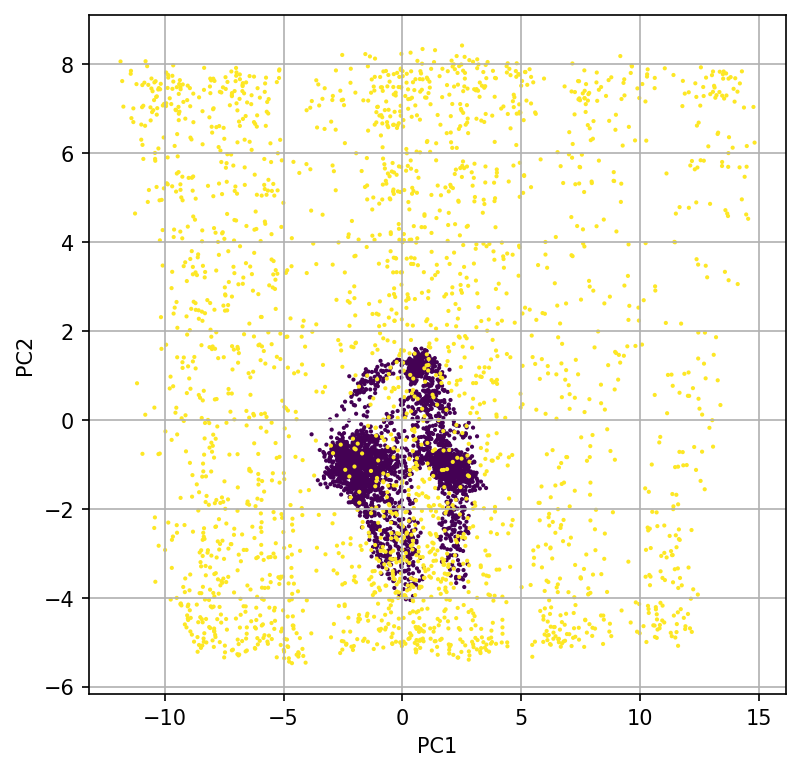

In [64]:
z_pred_pkl = main_path+'/logs_helix_R_nce/conf.495.pkl'

with open(z_pred_pkl, 'rb') as f:
    z_pred = pickle.load(f)

pc, pca = analysis.run_pca(z_pred)

plt.figure(figsize=(6, 6), dpi=150)
label = 2833*[0]+2494*[1]
plt.scatter(pc[:, 0], pc[:, 1],c=label,s=1)
plt.grid(True)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [66]:
reducer = umap.UMAP(n_neighbors=100)
umap_data = reducer.fit_transform(z_pred)
print(umap_data.shape)

(5327, 2)


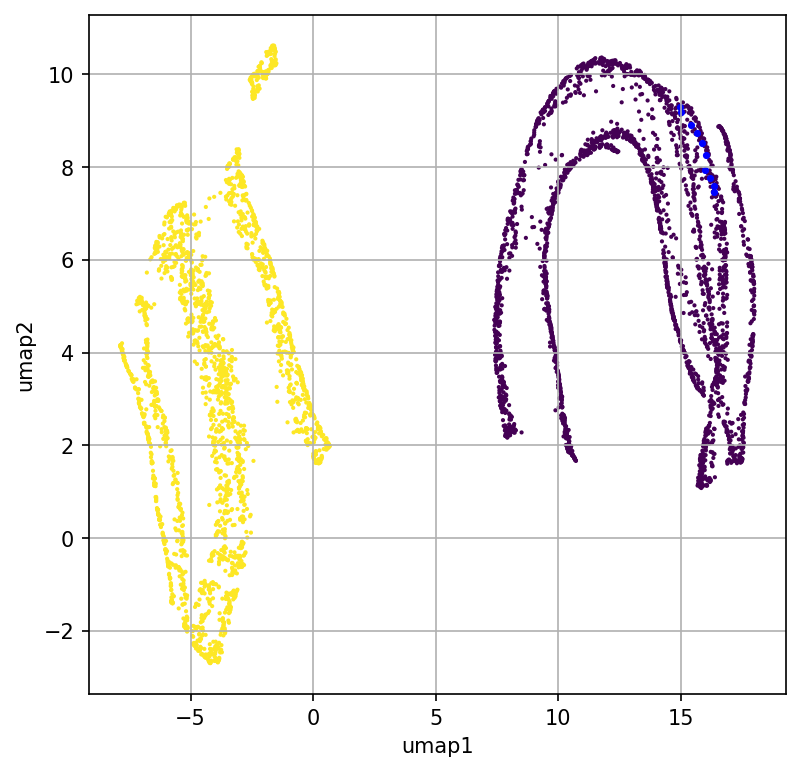

In [67]:
plt.figure(figsize=(6, 6), dpi=150)
plt.scatter(umap_data[:, 0], umap_data[:, 1],c=label,s=1)
plt.scatter(umap_data[:10, 0], umap_data[:10, 1],c='blue',s=6)
plt.grid(True)
plt.xlabel('umap1')
plt.ylabel('umap2')
plt.show()

In [ ]:
## Generate Volumes

In [ ]:
weights = 'path_to_model_weights.pkl'
n_volumes = 25
resolution = 128  # Make sure this is the resolution of the images given during training

out_dir = os.path.dirname(z_pred_pkl)
zs = analysis.get_pc_traj(pca, config["z_dim"], n_volumes, 1, np.min(pc[..., 0]), np.max(pc[..., 0]))
z_pkl = os.path.join(os.path.dirname(z_pred_pkl), 'z_traversal.pkl')

with open(z_pkl, 'wb') as f:
    pickle.dump(zs, f)

generate_volume(config, weights, resolution, out_dir, z_pkl)